<a href="https://colab.research.google.com/github/Mayuri2201/Automated-Data-Cleaning-and-Visualization-Tool/blob/main/Automated_Data_Cleaning_and_Visualization_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn

Upload your CSV file:


Saving cleaned_data.csv to cleaned_data (1).csv
Summary Statistics:
             id        age        income
count  7.000000   7.000000      7.000000
mean   4.000000  30.714286  56326.530612
std    2.160247   5.345225  16011.414781
min    1.000000  25.000000  30000.000000
25%    2.500000  27.500000  50000.000000
50%    4.000000  30.000000  54285.714286
75%    5.500000  32.500000  65000.000000
max    7.000000  40.000000  80000.000000


<ipython-input-4-b774f62c21fd>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


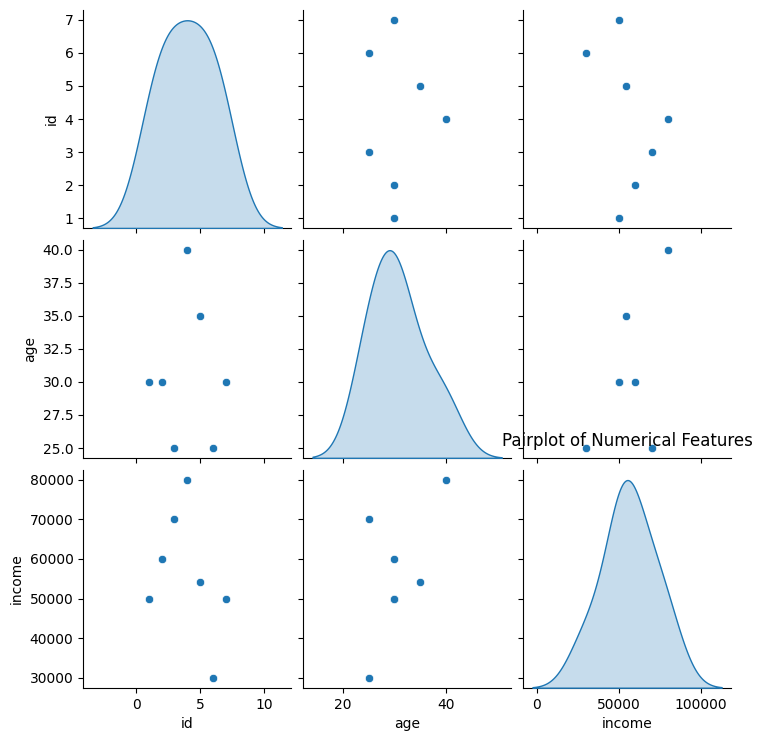

<Figure size 1200x600 with 0 Axes>

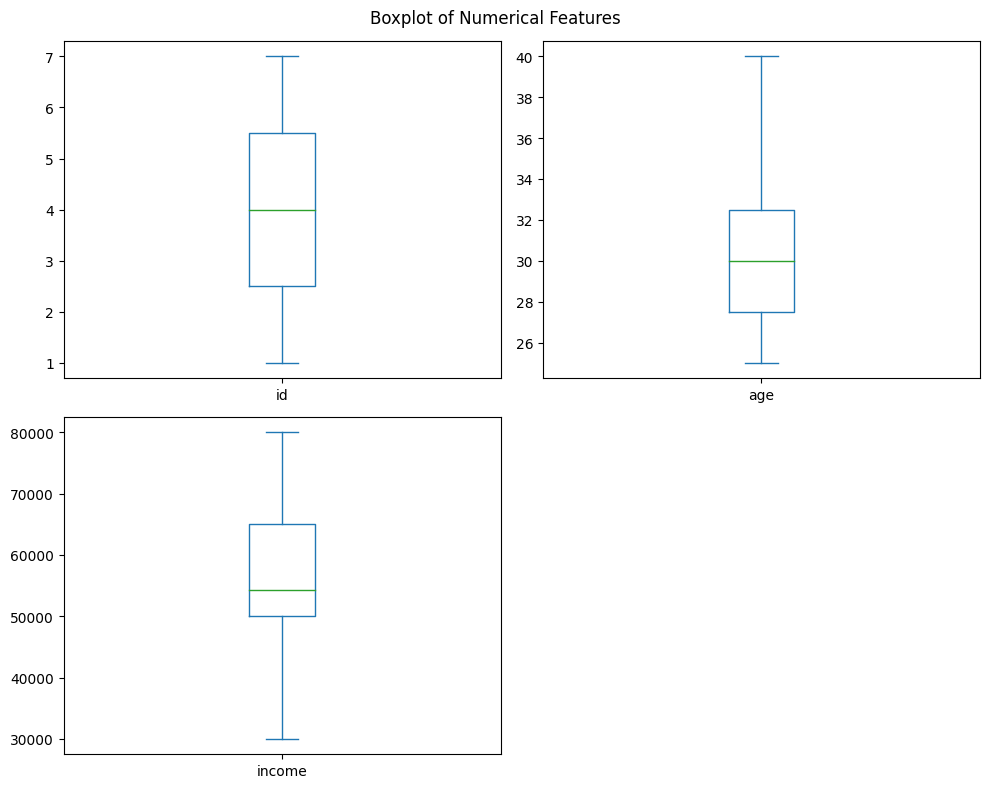

Cleaned data saved to cleaned_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Function to upload CSV file
def upload_file():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return pd.read_csv(io.BytesIO(uploaded[filename]))

# Function to clean the data
def clean_data(df):
    """Perform data cleaning operations."""

    # Handling missing values
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Remove outliers using Z-score method
    from scipy import stats
    df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

    return df

# Function to visualize the data
def visualize_data(df):
    """Generate visualizations for the dataset."""

    # Summary statistics
    print("Summary Statistics:")
    print(df.describe())

    # Pairplot for numerical features
    sns.pairplot(df, diag_kind='kde', markers='o')
    plt.title('Pairplot of Numerical Features')
    plt.show()

    # Boxplot for each numerical feature
    plt.figure(figsize=(12, 6))
    df.select_dtypes(include=[np.number]).plot.box(subplots=True, layout=(2, 2), figsize=(10, 8), title="Boxplot of Numerical Features")
    plt.tight_layout()
    plt.show()

# Function to save cleaned data
def save_cleaned_data(df, output_file):
    """Save the cleaned data to a new CSV file."""
    df.to_csv(output_file, index=False)
    print(f"Cleaned data saved to {output_file}")

# Main workflow
def main():
    print("Upload your CSV file:")
    df = upload_file()

    # Cleaning the data
    cleaned_df = clean_data(df)

    # Visualizing the data
    visualize_data(cleaned_df)

    # Saving cleaned data to a CSV file
    output_file = 'cleaned_data.csv'
    save_cleaned_data(cleaned_df, output_file)

    # Download cleaned data
    files.download(output_file)

# Run the main function
main()
